*Equipo: 11*

*Grupo: 002, miercoles 7:00-10:00 pm*

**Integrantes:**

*1819011, González Castillo Fernando Isaí*

*1563836, Sanabria Martínez Daniela Monserrat*
             
*1887939, Llanos Morales Alfonso*

## Preparación, limpieza y visualización de los datos

Titulo de la Base de Datos: Mushroom Classification

**Descripción de los datos:**

a) Nuestra base de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos laminados de las familias Agaricus y Lepiota, donde cada especie se identifica como venenosa o comestible.

b) Nuestra base de datos está conformada por 23 columnas que representan las caracteristicas que diferencia a cada hongo, como el color, la textura o la forma; todas las variables de la base son de tipo cualitativa y tienen el valor de un solo caracter; la base tiene 8124 filas, por lo que su tamaño sería de (8124 X 23).

**Justificación del uso de datos:**

a) La base de datos es muy descriptiva referente a las características de los hongos, contamos con columnas que nos muestran desde su forma, tamaño y color hasta el tipo de zona donde es más común encontrarlo.Al estar los datos recopilados de esta manera consideramos que sería más sencillo trabajar con ella y también nos daba una idea más clara de que tipo de técnica de minería utilizar.

b) El tipo de datos con los que vamos a trabajar es más intuitivo con relación al tipo de técnica de minería que podemos utilizar, también nos pareció importante el formato de texto para describir las variables, que es en forma categórica, ya que todas ellas están representadas por una letra y creemos que esto nos facilitará las operaciones.

**Objetivos:**

Saber cuáles son las principales características que determinan si un hongo es venenoso o comestible, así como la probabilidad de que un hongo en específico sea venenoso solamente describiendo sus atributos y detectarlo en el menor tiempo posible.

### Desarrollo de las herramientas

*a) Mostrar los datos sin manipulación*

In [2]:
import pandas as pd
import numpy as np

In [3]:
hongos = pd.read_csv("mushrooms.csv")

In [4]:
hongos

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
hongos.shape

(8124, 23)

*b) Eliminar columnas no desadas*

Decidimos traducir los nombres de las columnas y los valores al español para un mejor entendimiento.

In [6]:
hongos = hongos.rename(columns = {'class':'Clase', 'cap-shape':'Forma_Sombrero', 'cap-surface':'Superficie_Sombrero', 'cap-color':'Color_Sombrero', 'bruises':'Magulladura', 'odor':'Olor', 'gill-attachment':'Forma_Laminas', 'gill-spacing':'Espaciamiento_Laminas', 'gill-size':'Dimension_Laminas', 'gill-color':'Color_Laminas', 'stalk-shape':'Forma_Tallo', 'stalk-root':'Raiz_Tallo', 'stalk-surface-above-ring':'Superficie_tallo_sobre_anillo', 'stalk-surface-below-ring':'Superficie_tallo_bajo_anillo', 'stalk-color-above-ring':'Color_tallo_sobre_anillo', 'stalk-color-below-ring':'Color_tallo_bajo_anillo', 'veil-type':'Tipo_Velo', 'veil-color':'Color_Velo', 'ring-number':'Num_anillos', 'ring-type':'Tipo_anillo', 'spore-print-color':'Color_Espora', 'population':'Poblacion', 'habitat':'Habitat'})

In [7]:
v1={"b":"campana","c":"conica","x":"convexa","f":"plana","k":"mamelonado","s":"hundido"}
hongos["Forma_Sombrero"]=hongos["Forma_Sombrero"].replace(v1)
v2={"f": "fibroso", "g": "asurcada","y":"escamoso","s": "liso"}
hongos["Superficie_Sombrero"]=hongos["Superficie_Sombrero"].replace(v2)
v3={"n":"marron","b":"ante","c":"canela","g":"gris","r":"verde","p":"rosa","u":"violeta","e":"rojo","w":"blanco","y":"amarillo"}
hongos["Color_Sombrero"]=hongos["Color_Sombrero"].replace(v3)
v4={"a":"almendra","l":"anis","c":"creosota","y":"pescado","f":"sucio","m":"mohoso","n":"ninguno","p":"acre","s":"picante"}
hongos["Olor"]=hongos["Olor"].replace(v4)
v5={"a":"adherida","f":"libre", "d":"descendente", "n":"con_muescas"}
hongos["Forma_Laminas"]=hongos["Forma_Laminas"].replace(v5)
v6={"c":"cercanas","w":"apretadas", "d":"distantes"}
hongos["Espaciamiento_Laminas"]=hongos["Espaciamiento_Laminas"].replace(v6)
v7={"b":"ancho","n":"estrecho"}
hongos["Dimension_Laminas"]=hongos["Dimension_Laminas"].replace(v7)
v8={"k":"negro","b":"ante","n":"marron","h":"chocolate","g":"gris","r":"verde","o":"naranja","p":"rosa","u":"violeta","e":"rojo","w":"blanco","y":"amarillo"}
hongos["Color_Laminas"]=hongos["Color_Laminas"].replace(v8)
v9={"t":"estrechando","e":"agrandando"}
hongos["Forma_Tallo"]=hongos["Forma_Tallo"].replace(v9)
v10={"b":"bulboso","c":"garrote","e":"iguales","z":"rizomorfos","r":"enraizado","?":"faltante"}
hongos["Raiz_Tallo"]=hongos["Raiz_Tallo"].replace(v10)
v11={"s":"lisa","k":"sedosa","f":"fibrosa","y":"escamosa"}
hongos["Superficie_tallo_sobre_anillo"]=hongos["Superficie_tallo_sobre_anillo"].replace(v11)
hongos["Superficie_tallo_bajo_anillo"]=hongos["Superficie_tallo_bajo_anillo"].replace(v11)
v12={"n":"marron","b":"ante","c":"canela","g":"gris","p":"rosa","e":"rojo","w":"blanco","y":"amarillo","o":"naranja"}
hongos["Color_tallo_sobre_anillo"]=hongos["Color_tallo_sobre_anillo"].replace(v12)
hongos["Color_tallo_bajo_anillo"]=hongos["Color_tallo_bajo_anillo"].replace(v12)
v13={"p":"parcial","u":"universal"} 
hongos["Tipo_Velo"]=hongos["Tipo_Velo"].replace(v13)
v14={"n":"marron","o":"naranja","w":"blanco","y":"amarillo"} 
hongos["Color_Velo"]=hongos["Color_Velo"].replace(v14)
v15= {"n":"ninguno","o":"uno","t":"dos"}
hongos["Num_anillos"]=hongos["Num_anillos"].replace(v15)
v16={"c":"cortina","e":"evanescente","f":"llamarada","l":"grande","n":"ninguno","p":"colgante","s":"ascendente","z":"fugaz"}
hongos["Tipo_anillo"]=hongos["Tipo_anillo"].replace(v16)
v17= {"k":"negro","n":"marron","b":"ante","h":"chocolate","r":"verde","o":"naranja","u":"violeta","w":"blanco","y":"amarillo"}
hongos["Color_Espora"]=hongos["Color_Espora"].replace(v17)
v18={"a":"abundantes","c":"agrupados","n":"numerosos","s":"dispersos","v":"varios","y":"solitario"}
hongos["Poblacion"]=hongos["Poblacion"].replace(v18)
v19={"g":"pastos","l":"hojas","m":"prados","p":"caminos","u":"zona_urbana","w":"residuos","d":"bosques"}
hongos["Habitat"]=hongos["Habitat"].replace(v19)
v20={"t":"tiene","f":"no_tiene"}
hongos["Magulladura"]=hongos["Magulladura"].replace(v20)
v21={"p":"venenoso", "e":"comestible"}
hongos["Clase"]=hongos["Clase"].replace(v21)

In [8]:
hongos.Tipo_Velo.unique()

array(['parcial'], dtype=object)

Como la columna del tipo de velo solo contiene un único valor, el de "parcial", podemos eliminar dicha columna.

In [9]:
hongos = hongos.drop('Tipo_Velo', axis = 1)

In [10]:
hongos

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Olor,Forma_Laminas,Espaciamiento_Laminas,Dimension_Laminas,Color_Laminas,...,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Color_Espora,Poblacion,Habitat
0,venenoso,convexa,liso,marron,tiene,acre,libre,cercanas,estrecho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,dispersos,zona_urbana
1,comestible,convexa,liso,amarillo,tiene,almendra,libre,cercanas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,numerosos,pastos
2,comestible,campana,liso,blanco,tiene,anis,libre,cercanas,ancho,marron,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,numerosos,prados
3,venenoso,convexa,escamoso,blanco,tiene,acre,libre,cercanas,estrecho,marron,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,dispersos,zona_urbana
4,comestible,convexa,liso,gris,no_tiene,ninguno,libre,apretadas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,evanescente,marron,abundantes,pastos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,mamelonado,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8120,comestible,convexa,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,marron,uno,colgante,ante,varios,hojas
8121,comestible,plana,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,marron,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8122,venenoso,mamelonado,escamoso,marron,no_tiene,pescado,libre,cercanas,estrecho,ante,...,lisa,sedosa,blanco,blanco,blanco,uno,evanescente,blanco,varios,hojas


*c) Correcta manipulación de los datos nulos dentro de la base de datos*

In [11]:
hongos.isnull()

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Olor,Forma_Laminas,Espaciamiento_Laminas,Dimension_Laminas,Color_Laminas,...,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Color_Espora,Poblacion,Habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
hongos.isnull().any()

Clase                            False
Forma_Sombrero                   False
Superficie_Sombrero              False
Color_Sombrero                   False
Magulladura                      False
Olor                             False
Forma_Laminas                    False
Espaciamiento_Laminas            False
Dimension_Laminas                False
Color_Laminas                    False
Forma_Tallo                      False
Raiz_Tallo                       False
Superficie_tallo_sobre_anillo    False
Superficie_tallo_bajo_anillo     False
Color_tallo_sobre_anillo         False
Color_tallo_bajo_anillo          False
Color_Velo                       False
Num_anillos                      False
Tipo_anillo                      False
Color_Espora                     False
Poblacion                        False
Habitat                          False
dtype: bool

In [13]:
hongos.isnull().sum()

Clase                            0
Forma_Sombrero                   0
Superficie_Sombrero              0
Color_Sombrero                   0
Magulladura                      0
Olor                             0
Forma_Laminas                    0
Espaciamiento_Laminas            0
Dimension_Laminas                0
Color_Laminas                    0
Forma_Tallo                      0
Raiz_Tallo                       0
Superficie_tallo_sobre_anillo    0
Superficie_tallo_bajo_anillo     0
Color_tallo_sobre_anillo         0
Color_tallo_bajo_anillo          0
Color_Velo                       0
Num_anillos                      0
Tipo_anillo                      0
Color_Espora                     0
Poblacion                        0
Habitat                          0
dtype: int64

Con las pruebas realzadas anteriormente podemos afirmar que no contamos con datos nulos, por lo que no tendríamos que manipular la base de datos en este punto.

*d) Explicar a detalle entre cada línea de código la razón por la cual se decidió remover o modificar cada columna*

Como se mencionó anteriormente solo fue necesario eliminar la columna "Tipo_Velo" debido a que contenía solo una respuesta para todas las observaciones en la base de datos.

In [14]:
len(hongos)

8124

In [15]:
hongos.drop_duplicates()
len(hongos.drop_duplicates())

8124

Con el resultado de la prueba anterior podemos afirmar que no contamos con filas duplicadas, esto nos quiere decir que todos los hongos dentro de la base de datos son distintos en al menos una caracteristica, por lo que no será imposible darle una clasificación a un hongo en especifico ni sera necesario eliminar o modificar alguna de las filas.

*e) Crear un nuevo archivo con la base de datos editada*

In [16]:
hongos.to_csv("BD_hongos.csv", index = False)

In [17]:
hongos

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Olor,Forma_Laminas,Espaciamiento_Laminas,Dimension_Laminas,Color_Laminas,...,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Color_Espora,Poblacion,Habitat
0,venenoso,convexa,liso,marron,tiene,acre,libre,cercanas,estrecho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,dispersos,zona_urbana
1,comestible,convexa,liso,amarillo,tiene,almendra,libre,cercanas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,numerosos,pastos
2,comestible,campana,liso,blanco,tiene,anis,libre,cercanas,ancho,marron,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,numerosos,prados
3,venenoso,convexa,escamoso,blanco,tiene,acre,libre,cercanas,estrecho,marron,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,dispersos,zona_urbana
4,comestible,convexa,liso,gris,no_tiene,ninguno,libre,apretadas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,evanescente,marron,abundantes,pastos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,mamelonado,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8120,comestible,convexa,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,marron,uno,colgante,ante,varios,hojas
8121,comestible,plana,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,marron,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8122,venenoso,mamelonado,escamoso,marron,no_tiene,pescado,libre,cercanas,estrecho,ante,...,lisa,sedosa,blanco,blanco,blanco,uno,evanescente,blanco,varios,hojas


Además decidimos guardar en otros archivos las agrupaciones por la categoría de venoso o comestible:

In [18]:
hongos.Clase.unique()

array(['venenoso', 'comestible'], dtype=object)

In [19]:
venenoso=hongos[hongos['Clase']=='venenoso']
venenoso.to_csv('Venenoso.csv', index=False)

In [20]:
comestible=hongos[hongos['Clase']=='comestible']
comestible.to_csv('Comestible.csv', index=False)

### 2. Estadística Básica y Gráficas de los datos

In [21]:
100*hongos['Clase'].value_counts()/len(hongos['Clase'])

comestible    51.797144
venenoso      48.202856
Name: Clase, dtype: float64

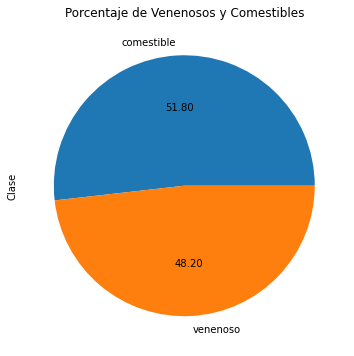

In [22]:
hongos['Clase'].value_counts().plot(kind = "pie",  autopct='%.2f', figsize=(6, 6), title='Porcentaje de Venenosos y Comestibles')

 El gráfico de pastel anterior nos sirvió para apreciar las proporciones de hongos comestibles y venenosos con los que contamos en nuestra base de datos y así darnos cuenta que las cantidades son similares en ambas categorias.

#### Uncertainty coefficient o Coeficente de Incertidumbre

En estadística es coeficiente de incertidumbre, también conocido como *coeficiente de entropía*, es una medida de asociación nominal. Este es útil para medir la validez de un algritmo de clasificación estadística. El coeficiente de incertidumbre toma valores entre 0 y 1, donde 0 significa que la característica $y$ no provee información acerca de la característica $x$, y 1 significa que $y$ provee de toda la información acerca del valor de la característica $x$.

Link: https://en.wikipedia.org/wiki/Uncertainty_coefficient

In [23]:
import math
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from subprocess import check_output

In [24]:
def condicional_entropia(x,y):
    y_contador = Counter(y)
    xy_contador = Counter(list(zip(x,y)))
    T_ocurrencias = sum(y_contador.values())
    entropia = 0
    for i in xy_contador.keys():
        p_xy = xy_contador[i] / T_ocurrencias
        p_y = y_contador[i[1]] / T_ocurrencias
        entropia = entropia + (p_xy * math.log(p_y/p_xy))
    return entropia

def Coef_In(x,y):
    s_xy = condicional_entropia(x,y)
    x_contador = Counter(x)
    T_ocurrencias = sum(x_contador.values())
    p_x = list(map(lambda n: n/T_ocurrencias, x_contador.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

En el código anterior se declaran dos funciones que serán utilizadas a continuación, en la primera, *condicional_entropia()* se realiza el cálculo de la entropía entre las variables $x$ y $y$ utilizando las frecuencias y la formula mostrada en el link de la parte superior, este valor será guardado y utilizado en la función siguiente, *Coef_In()*, donde se obtendrá el coeficiente de incertidumbre.

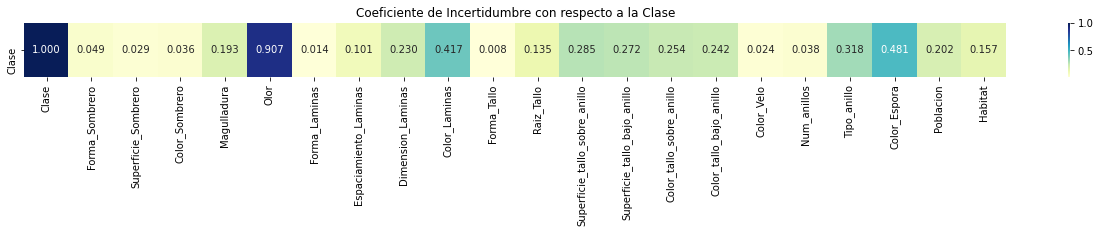

In [25]:
CI = pd.DataFrame(index=['Clase'],columns=hongos.columns)
columns = hongos.columns
for j in range(0,len(columns)):
    u = Coef_In(hongos['Clase'].tolist(),hongos[columns[j]].tolist())
    CI.loc[:,columns[j]] = u
CI.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(22,1))
sns.heatmap(CI,annot=True,fmt='.3f', cmap = "YlGnBu")
plt.title("Coeficiente de Incertidumbre con respecto a la Clase")
plt.show()

Como podemos observar las características que más influyen en el hecho de que un hongo sea venenoso o comestible son el olor, el color de las láminas y el color de las esporas, por lo que para nuestros siguientes análisis nos enfocaremos en estas tres características.

### Gráficas multivariadas

Nos apoyamos en el código de Raul E. Lopez Briega para la realización de los siguientes análisis

Link: https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/

Ahora utilizando la función *crosstab()* de *pandas* obtendremos las frecuencias y proporciones de la relación entre las columnas *Clase* y *Olor* por medio de tablas de contingencia.

In [26]:
pd.crosstab(index=hongos['Clase'], columns = hongos['Olor'], margins=True)

Olor,acre,almendra,anis,creosota,mohoso,ninguno,pescado,picante,sucio,All
Clase,,,,,,,,,,
comestible,0,400,400,0,0,3408,0,0,0,4208
venenoso,256,0,0,192,36,120,576,576,2160,3916
All,256,400,400,192,36,3528,576,576,2160,8124


In [27]:
pd.crosstab(index=hongos['Clase'], columns = hongos['Olor'], margins=True).apply(lambda r: r/len(hongos) *100, axis=1)

Olor,acre,almendra,anis,creosota,mohoso,ninguno,pescado,picante,sucio,All
Clase,,,,,,,,,,
comestible,0.000000,4.923683,4.923683,0.000000,0.000000,41.949778,0.000000,0.000000,0.000000,51.797144
venenoso,3.151157,0.000000,0.000000,2.363368,0.443131,1.477105,7.090103,7.090103,26.587888,48.202856
All,3.151157,4.923683,4.923683,2.363368,0.443131,43.426883,7.090103,7.090103,26.587888,100.000000


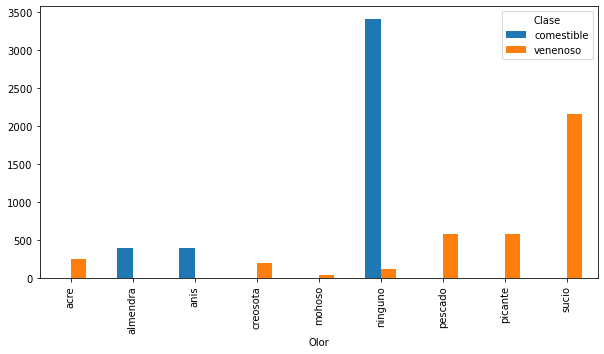

In [28]:
pd.crosstab(index=hongos['Olor'], columns = hongos['Clase']).plot(kind = "bar", figsize = (10, 5))

Por la distribución de las frecuencias en la tablas de contingencia y analizando el gráfico de barras notamos que los hongos venesosos y comestibles tienen olores muy caracteristicos, como por ejemplo los hongos comestibles tienen olores similares a almendras y anís, en cambio los hongos venenosos tienen un aroma similar a acre, picante, pescado o a sucio. El problema será cuando el hongo no presente ningún olor, ya que los hongos venenosos y comestibles comparten esta caracteristica.

#### Dummy variable algorithm o algoritmo de variables ficticias.
Una variable ficticia es aquella que toma solo el valor 0 o 1 para indicar la ausencia o presencia de algún efecto categórico que se puede esperar que cambie el resultado.

Link: https://youtu.be/DAQhQFp-sCg

In [29]:
Clase_Olor = pd.get_dummies(hongos["Clase"], prefix = "Clase")
Olor = pd.get_dummies(hongos["Olor"], prefix = "Olor")
Clase_Olor = pd.concat([Clase_Olor, Olor], axis = 1)
Clase_Olor

,Clase_comestible,Clase_venenoso,Olor_acre,Olor_almendra,Olor_anis,Olor_creosota,Olor_mohoso,Olor_ninguno,Olor_pescado,Olor_picante,Olor_sucio
0,0,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,0,1,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,0
8121,1,0,0,0,0,0,0,1,0,0,0
8122,0,1,0,0,0,0,0,0,1,0,0


Utilizando la función *get_dummies()* de la librería *pandas* podemos transformar columnas específicas de nuestra base de datos a valores binarios, donde el 1 representa la presencia y 0 la ausencia de la categoria en cuestión, luego con la función *concat* también de la librería *pandas* concatenamos ambos DataFrames.

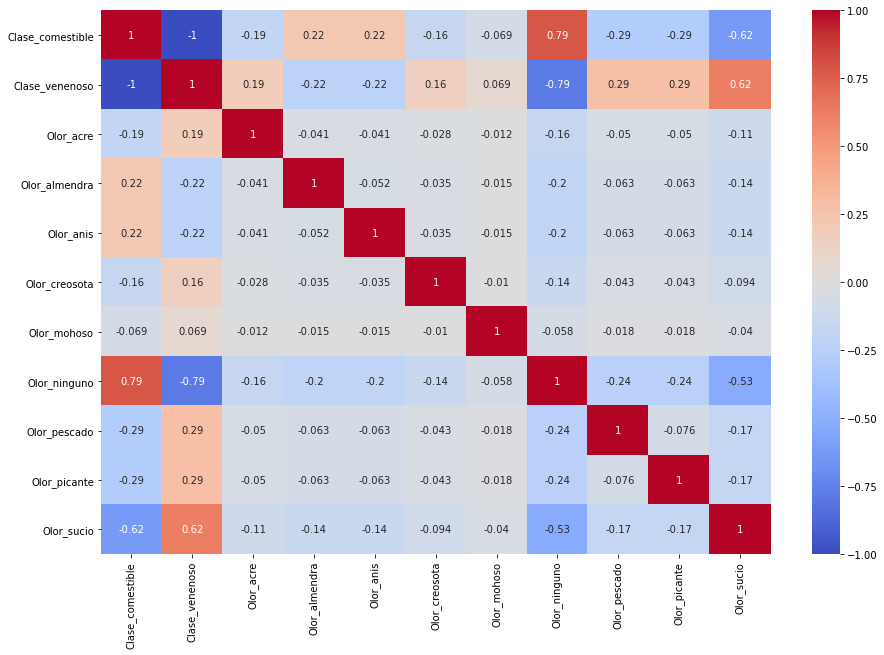

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(Clase_Olor.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

Utilizar variables ficticias nos da la oportunidad de obtener la correlación entre las posibles respuestas de nuestra columna objetivo *Clase* y la que fue más significativa utilizando el coeficiente de incertidumbre *Olor*, así podemos darnos cuenta que los olores que más están relacionados con los hongos comestibles son el olor a almendra, anís y sin olor (esto debido a que la gran mayoria de hongos sin olor en la base de datos son comestibles, pero esta respuesta no nos da un resultado claro), en cambio para los hongos venenosos son pescado, picante y sucio. Tomando en cuenta los resultados obtenidos de la gráfica de frecuencias, las tablas de contingencia y la matríz de correlaciones podemos llegar a las mismas conclusiones, donde podríamos determinar si un hongo es comestible o venenoso únicamente con su olor, con excepción de los hongos que no presentan olor, por lo que tendríamos que seguir comparando características para llegar a una mejor conclusión.

Como la columna *Olor* no nos aporta un resultado claro para todas las opciones, pasamos a realizar el análisis entre la característica objetivo y la segunda columna más significativa *Color_Espora*.

In [31]:
pd.crosstab(index=hongos['Clase'], columns = hongos['Color_Espora'], margins=True)

Color_Espora,amarillo,ante,blanco,chocolate,marron,naranja,negro,verde,violeta,All
Clase,,,,,,,,,,
comestible,48,48,576,48,1744,48,1648,0,48,4208
venenoso,0,0,1812,1584,224,0,224,72,0,3916
All,48,48,2388,1632,1968,48,1872,72,48,8124


In [32]:
pd.crosstab(index=hongos['Clase'], columns = hongos['Color_Espora'], margins=True).apply(lambda r: r/len(hongos) *100, axis=1)

Color_Espora,amarillo,ante,blanco,chocolate,marron,naranja,negro,verde,violeta,All
Clase,,,,,,,,,,
comestible,0.590842,0.590842,7.090103,0.590842,21.467258,0.590842,20.285574,0.000000,0.590842,51.797144
venenoso,0.000000,0.000000,22.304284,19.497784,2.757262,0.000000,2.757262,0.886263,0.000000,48.202856
All,0.590842,0.590842,29.394387,20.088626,24.224520,0.590842,23.042836,0.886263,0.590842,100.000000


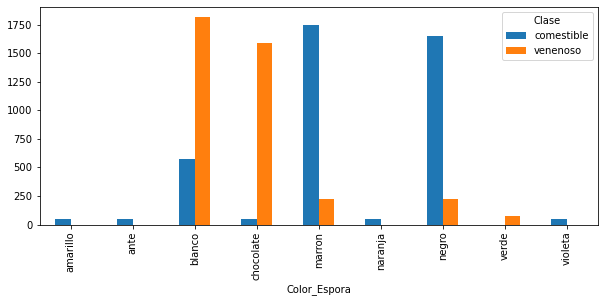

In [33]:
pd.crosstab(index=hongos['Color_Espora'], columns = hongos['Clase']).plot(kind = "bar", figsize = (10, 4))

Con la ayuda de la tabla de frecuencia y el gráfico identificamos si existen carecteristicas únicas o diferenciadoras con respecto al color de sus esporas, ya que si son de color amarillo, ante, naranja o violeta podemos suponer que el hongo es comesible, en cambio si son de color verde podemos suponer que se trata de un hongo venenoso.

In [34]:
Clase_ColorEsp = pd.get_dummies(hongos["Clase"], prefix = "Clase")
ColorEsp = pd.get_dummies(hongos["Color_Espora"], prefix = "Color_Espora")
Clase_ColorEsp = pd.concat([Clase_ColorEsp, ColorEsp], axis = 1)

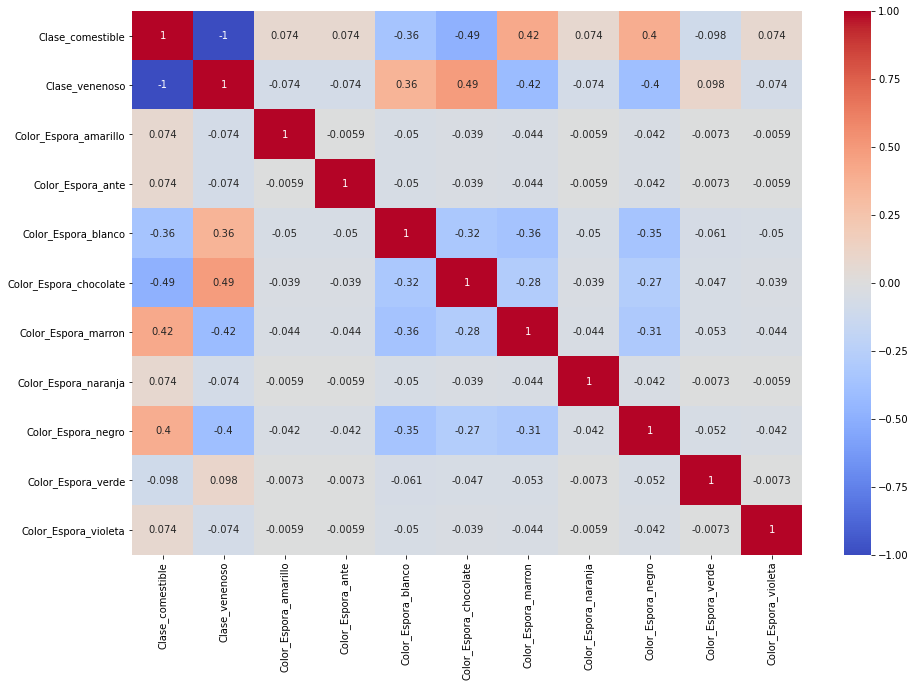

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(Clase_ColorEsp.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

La matríz de correlaciones nos indica que los colores de las esporas con mayor relación en los hongos comestibles son el marrón y el negro, y los colores que más se relacionan con los hongos venenosos son el blanco y el chocolate, lamentablemente cuando comparamos los resultados de las correlaciones con las tablas de contingencia y la gráfica de frecuencias notamos que justo estos colores son los que se encuentran presentes en ambos tipos de hongos, por lo que la columna *Color_Espora* no resolverá todas las dudas que nos dejó la columna *Olor*, pero puede que al momento de realizar en álbol de decisión si nos ayude a clasificar algunos hongos que no presentaron olor.

El último análisis que realizaremos con las columna objetivo *Clase* será con *Color_Laminas*

In [36]:
pd.crosstab(index=hongos['Clase'], columns = hongos['Color_Laminas'], margins=True)

Color_Laminas,amarillo,ante,blanco,chocolate,gris,marron,naranja,negro,rojo,rosa,verde,violeta,All
Clase,,,,,,,,,,,,,
comestible,64,0,956,204,248,936,64,344,96,852,0,444,4208
venenoso,22,1728,246,528,504,112,0,64,0,640,24,48,3916
All,86,1728,1202,732,752,1048,64,408,96,1492,24,492,8124


In [37]:
pd.crosstab(index=hongos['Clase'], columns = hongos['Color_Laminas'], margins=True).apply(lambda r: r/len(hongos) *100, axis=1)

Color_Laminas,amarillo,ante,blanco,chocolate,gris,marron,naranja,negro,rojo,rosa,verde,violeta,All
Clase,,,,,,,,,,,,,
comestible,0.787789,0.00000,11.767602,2.511078,3.052683,11.521418,0.787789,4.234367,1.181684,10.487445,0.000000,5.465288,51.797144
venenoso,0.270803,21.27031,3.028065,6.499261,6.203840,1.378631,0.000000,0.787789,0.000000,7.877893,0.295421,0.590842,48.202856
All,1.058592,21.27031,14.795667,9.010340,9.256524,12.900049,0.787789,5.022157,1.181684,18.365337,0.295421,6.056130,100.000000


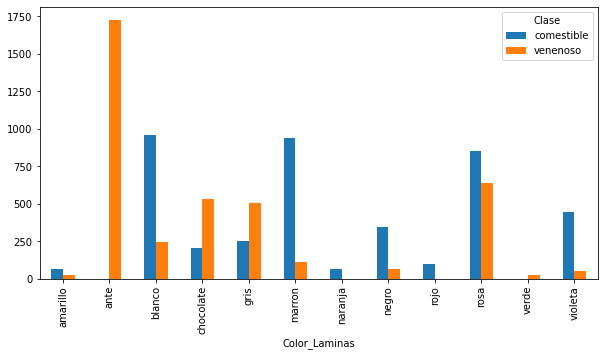

In [38]:
pd.crosstab(index=hongos['Color_Laminas'], columns = hongos['Clase']).plot(kind = "bar", figsize = (10, 5))

Con la ayuda de la tabla de frecuencia y el gráfico identificamos si existen carecteristicas únicas o diferenciadoras con respecto al color de sus laminas, ya que si un hongo tiene sus laminas de color naranja y rojo puede tratarse de un hongo comestible y cuando sus laminas de color ante y verde se trata de un hongo venenoso.

In [39]:
Clase_ColorLam = pd.get_dummies(hongos["Clase"], prefix = "Clase")
ColorLam = pd.get_dummies(hongos["Color_Laminas"], prefix = "Color_Laminas")
Clase_ColorLam = pd.concat([Clase_ColorLam, ColorLam], axis = 1)

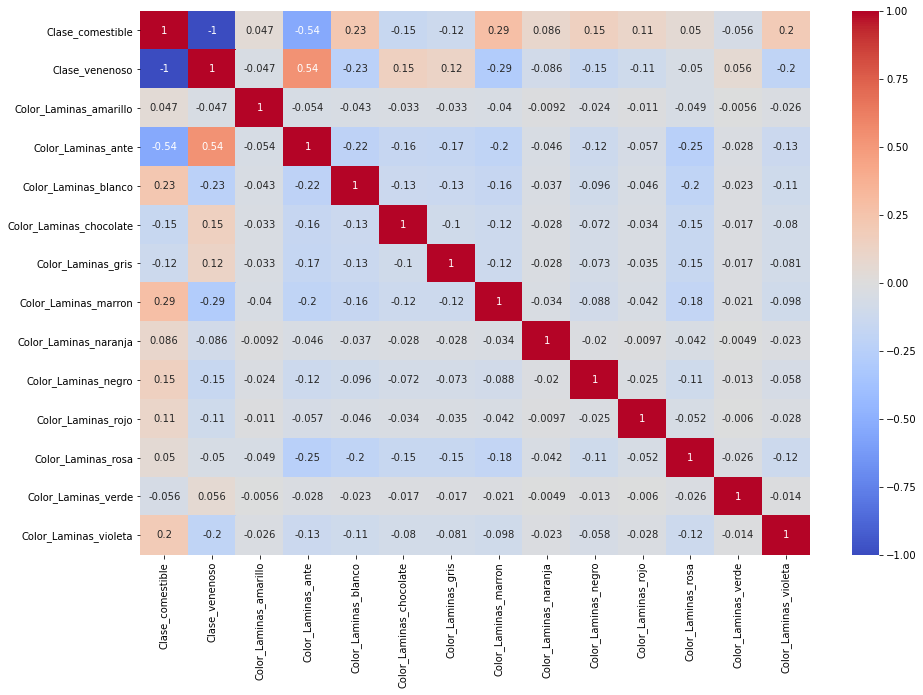

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(Clase_ColorLam.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

Los colores de las láminas que mayor correlación presentan con los hongos comestibles son las láminas blancas y marrones, en cambio las láminas color ante son las que más se relacionan con los hongos venenosos. En este caso solo las láminas color ante son una respuesta importante en la clasificación de los hongos si tomamos en cuenta tanto la matríz de correlaciones como el gráfico y tablas de frecuencias.

Para finalizar con el análisis en este avance del proyecto revizaremos como se relacionan las variables *Olor*, *Color_Espora* y *Color_Laminas* entre sí.

In [41]:
F_Olor_CEsp = pd.crosstab(index=hongos['Olor'], columns = hongos['Color_Espora']).apply(lambda r: r/len(hongos) *100, axis=1)
F_Olor_CEsp

Color_Espora,amarillo,ante,blanco,chocolate,marron,naranja,negro,verde,violeta
Olor,,,,,,,,,
acre,0.000000,0.000000,0.000000,0.000000,1.575579,0.000000,1.575579,0.000000,0.000000
almendra,0.000000,0.000000,0.000000,0.000000,2.461841,0.000000,2.166420,0.000000,0.295421
anis,0.000000,0.000000,0.000000,0.000000,2.461841,0.000000,2.166420,0.000000,0.295421
creosota,0.000000,0.000000,0.000000,0.000000,1.181684,0.000000,1.181684,0.000000,0.000000
mohoso,0.000000,0.000000,0.443131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ninguno,0.590842,0.590842,7.680945,0.590842,16.543575,0.590842,15.952733,0.886263,0.000000
pescado,0.000000,0.000000,7.090103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
picante,0.000000,0.000000,7.090103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sucio,0.000000,0.000000,7.090103,19.497784,0.000000,0.000000,0.000000,0.000000,0.000000


El código anterior imprime una tabla de contingencia donde se muestran las proporciones de las relaciones entre las columnas *Olor* y *Color_Espora*.

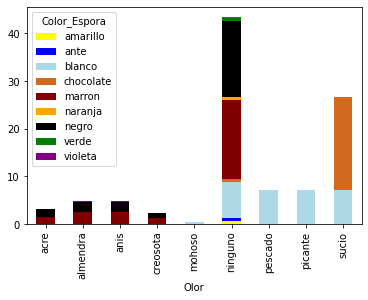

In [53]:
F_Olor_CEsp.plot.bar(stacked=True, color=['yellow','blue','lightblue','chocolate', 'maroon', 'orange', 'black', 'green', 'purple'])

Como ya se ha mencionado antes podemos ver que la mayoría de los hongos no presentan olor con casi el 50% de las observaciones, seguido por la proporción de hongos con olor a sucio. Además, en esta gráfica notamos que de los hongos sin olor, casi todos tienen esporas de color negro, marrón y blanco; y que los hongos olor a sucio tienen sus esporas color chocolate y blancas.

In [43]:
F_CEsp_CLam = pd.crosstab(index=hongos['Color_Espora'], columns = hongos['Color_Laminas']).apply(lambda r: r/len(hongos) *100, axis=1)
F_CEsp_CLam

Color_Laminas,amarillo,ante,blanco,chocolate,gris,marron,naranja,negro,rojo,rosa,verde,violeta
Color_Espora,,,,,,,,,,,,
amarillo,0.196947,0.00000,0.000000,0.000000,0.000000,0.196947,0.196947,0.000000,0.000000,0.000000,0.000000,0.00000
ante,0.196947,0.00000,0.000000,0.000000,0.000000,0.196947,0.196947,0.000000,0.000000,0.000000,0.000000,0.00000
blanco,0.270803,21.27031,4.308223,0.000000,1.181684,0.000000,0.000000,0.000000,1.181684,1.181684,0.000000,0.00000
chocolate,0.000000,0.00000,1.329394,6.646972,5.317578,0.000000,0.000000,0.000000,0.000000,6.646972,0.000000,0.14771
marron,0.196947,0.00000,4.431315,1.181684,1.230921,6.253077,0.196947,2.511078,0.000000,5.268341,0.000000,2.95421
naranja,0.196947,0.00000,0.000000,0.000000,0.000000,0.196947,0.196947,0.000000,0.000000,0.000000,0.000000,0.00000
negro,0.000000,0.00000,4.234367,1.181684,1.230921,5.859183,0.000000,2.511078,0.000000,5.071393,0.000000,2.95421
verde,0.000000,0.00000,0.295421,0.000000,0.295421,0.000000,0.000000,0.000000,0.000000,0.000000,0.295421,0.00000
violeta,0.000000,0.00000,0.196947,0.000000,0.000000,0.196947,0.000000,0.000000,0.000000,0.196947,0.000000,0.00000


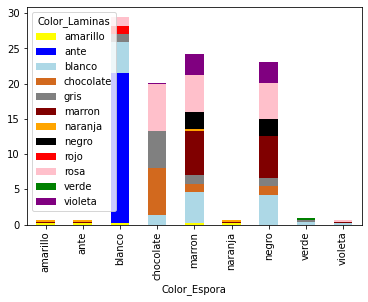

In [54]:
F_CEsp_CLam.plot.bar(stacked=True, color=['yellow','blue','lightblue','chocolate','gray', 'maroon', 'orange', 'black', 'red', 'pink', 'green', 'purple'])

Podemos ver que más de la mitad de los hongos con esporas de color blanco tienen láminas de color ante, para los demás colores de espora, la distribución de los colores de las láminas no parecen decantarse por un color en específico.

### Conclusión Global


Gracias al análisis que realizamos a la base de datos pudimos identificar las principales características que determinan si un hongo es venenoso o comestible, estas en orden de relevancia son *Olor*, *Color_Espora* y *Color_Laminas*, resultó particularmente sorprendente descubrir que cada categoría de hongos tiene olores muy peculiares y que la única confusión estaría dada en el caso de que el hongo no muestre olor, para estos casos en los que aún presentabamos incógnitas fue importante conocer cuales eran los colores de las esporas que determinaban su *Clase*, donde los colores amarillo, ante, naranja y violeta están presentes en hongos comestibles y el color verde sólo se encuentra en hongos venenosos, pero las frecuencias de los hongos con colores de sus esporas determinantes en la clase son una minoría, siendo así necesario obtener el análisis de la siguiente característica de importancia, el *Color_Laminas*, donde los colores naranja y rojo sólo se encuentran en hongos comestibles y los colores ante y verde, son únicos en hongos venenosos, pero todavía nos quedamos con hongos sin clasificar. Lamentablemente llegamos a la conclusión que no es posible dar una clasificación a todos los hongos únicamente tomando en consideración las tres características que más influyen, por lo que el siguiente paso en el análisis será la construcción de un árbol de decisión que tome en cuenta las características restantes para los hongos que todavía no cuentan con clasificación.